In [1]:
import pandas as pd
import glob, os
#from dataprep.eda import plot_correlation
#from dataprep.eda import plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy import interpolate
from sklearn.linear_model import LinearRegression
import pandas as pd
#import datacleaner
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


import random
from matplotlib import pyplot as plt
from matplotlib import colors as mpc
plt.rcParams["font.family"] = "Poppins"
from sklearn.mixture import GaussianMixture

import seaborn as sns; sns.set()
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from gmr.utils import check_random_state
#from gmr import MVN, GMM, plot_error_ellipses
#random_state = check_random_state(0)

from IPython.display import clear_output

%load_ext autoreload
%autoreload 
%matplotlib inline


import plotly.express as px

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
#from bioinfokit.analys import get_data, stat
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
mit = pd.read_csv('MOD-00399-raw.csv')
mit['localtime'] = pd.to_datetime(mit['timestamp_local'],format="%Y-%m-%dT%H:%M:%SZ")
mit.head()

,timestamp,id,timestamp_local,sn,rh,temp,bin0,bin1,bin2,bin3,...,co2,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,co2_model_id,localtime
0,2024-09-12T18:52:03Z,210063896,2024-09-12T18:52:03Z,MOD-00399,66.4,29.5,36.331,2.416,0.176,0.059,...,475.112,10806.0,10807.0,10808.0,NaN,NaN,NaN,NaN,10777.0,2024-09-12 18:52:03
1,2024-09-12T18:51:03Z,210063897,2024-09-12T18:51:03Z,MOD-00399,66.3,29.5,39.661,2.678,0.190,0.049,...,475.714,10806.0,10807.0,10808.0,NaN,NaN,NaN,NaN,10777.0,2024-09-12 18:51:03
2,2024-09-12T18:50:03Z,210063894,2024-09-12T18:50:03Z,MOD-00399,65.9,29.5,34.990,2.165,0.192,0.053,...,473.907,10806.0,10807.0,10808.0,NaN,NaN,NaN,NaN,10777.0,2024-09-12 18:50:03
3,2024-09-12T18:49:03Z,210063895,2024-09-12T18:49:03Z,MOD-00399,65.7,29.6,31.345,2.199,0.208,0.062,...,473.666,10806.0,10807.0,10808.0,NaN,NaN,NaN,NaN,10777.0,2024-09-12 18:49:03
4,2024-09-12T18:27:36Z,210063355,2024-09-12T18:27:36Z,MOD-00399,62.5,29.9,42.957,4.631,0.254,0.036,...,469.210,10806.0,10807.0,10808.0,NaN,NaN,NaN,NaN,10777.0,2024-09-12 18:27:36


In [3]:
ts = pd.read_csv('4_factor_MOD-00399/timeseries.csv')
results = pd.read_csv('4_factor_MOD-00399/results.csv')
results['localtime'] = ts['localtime']

data = pd.concat([ts,results['Factor 1'],results['Factor 2'], results['Factor 3'],results['Factor 4'],mit['ws'],mit['wd']],axis=1)
ts['localtime'] = pd.to_datetime(ts['localtime']) #convert timestamp column to pandas timestamp format
data = data.set_index('localtime',append=False) #setindex as local time

data.head()

,Unnamed: 0,bin0,bin1,bin2,bin3,bin4,bin5,co_diff,no_diff,no2_diff,ox_diff,Factor 1,Factor 2,Factor 3,Factor 4,ws,wd
localtime,,,,,,,,,,,,,,,,,
2024-09-12 18:52:03,0.0,36.331,2.416,0.176,0.059,0.079,0.029,391.0,6.5,12.0,2.0,0.290911,240.746022,15.750732,3.628877,0.82,242.0
2024-09-12 18:51:03,1.0,39.661,2.678,0.190,0.049,0.074,0.042,422.2,7.7,13.2,1.8,0.349527,261.094037,17.063836,3.707621,1.39,256.6
2024-09-12 18:50:03,2.0,34.990,2.165,0.192,0.053,0.129,0.042,360.3,7.6,15.0,1.8,0.516812,230.387389,14.158443,2.276086,0.90,248.8
2024-09-12 18:49:03,3.0,31.345,2.199,0.208,0.062,0.081,0.047,392.9,9.8,20.1,1.4,0.772227,272.499346,11.369729,2.097072,1.02,243.1
2024-09-12 18:27:36,4.0,42.957,4.631,0.254,0.036,0.024,0.046,432.5,9.5,13.2,1.5,0.406150,258.983281,18.475351,4.412223,1.01,246.8


In [4]:
wd_rad = np.radians(np.array(data['wd'])) #deg to rad
ws = np.array(data['ws']) #m/s
Factor1 = np.array(data['Factor 1'])
Factor2 = np.array(data['Factor 2'])
Factor3 = np.array(data['Factor 3'])
Factor4 = np.array(data['Factor 4'])

In [5]:
WD, WS = np.meshgrid(np.linspace(0, 2*np.pi, 36), np.linspace(min(ws), max(ws), 16 ))
Z1 = interpolate.griddata((wd_rad, ws), Factor1, (WD, WS), method='linear')
Z2 = interpolate.griddata((wd_rad, ws), Factor2, (WD, WS), method='linear')
Z3 = interpolate.griddata((wd_rad, ws), Factor3, (WD, WS), method='linear')
Z4 = interpolate.griddata((wd_rad, ws), Factor4, (WD, WS), method='linear')

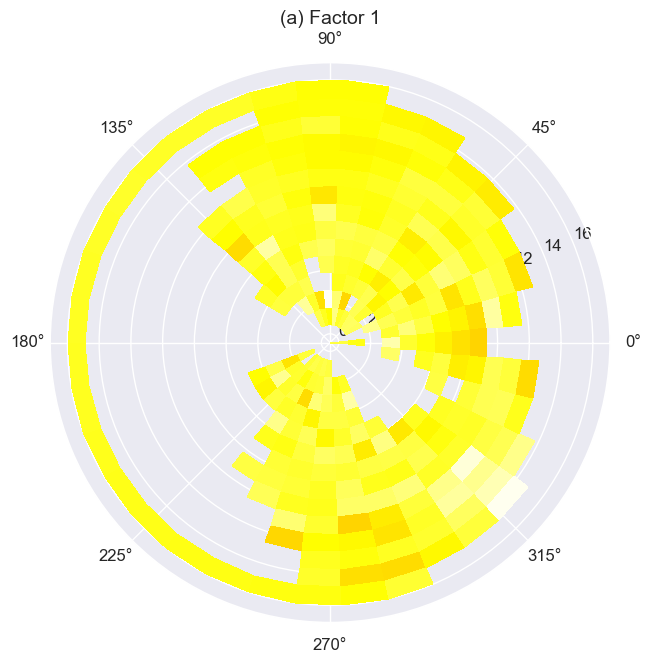

In [6]:
fig = plt.figure(figsize=(16,16))
ax1= fig.add_subplot(221, projection='polar')
ax1.set_title('(a) Factor 1',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax1.pcolormesh(WD, WS, Z1, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax1.tick_params(axis='both', which='major', labelsize=12)


In [7]:
ax2= fig.add_subplot(222, projection='polar')
ax2.set_title('(b) Factor 2',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax2.pcolormesh(WD, WS, Z2, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax2.tick_params(axis='both', which='major', labelsize=12)

In [8]:
ax3= fig.add_subplot(223, projection='polar')
ax3.set_title('(c) Factor 3',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax3.pcolormesh(WD, WS, Z3, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax3.tick_params(axis='both', which='major', labelsize=12)

In [9]:
ax4= fig.add_subplot(224, projection='polar')
ax4.set_title('(c) Factor 4',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax4.pcolormesh(WD, WS, Z4, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax4.tick_params(axis='both', which='major', labelsize=12)

In [10]:
#fig.subplots_adjust(top=1)
cbar_ax = fig.add_axes([0.05, 0.05, 0.90, 0.05])
clb=fig.colorbar(img, cax=cbar_ax, orientation='horizontal')#, label='Factor Intensity (a.u.)')
clb.ax.tick_params(labelsize=14) 
clb.ax.set_title('Factor Intensity (a.u.)',fontsize=14)
cbar_ax.tick_params(labelsize=14)

In [11]:
ax1.set_axisbelow(False)
ax1.grid(color='gray', linestyle='dashed',linewidth=2)
ax1.set_rlabel_position(0)


ax2.set_axisbelow(False)
ax2.grid(color='gray', linestyle='dashed',linewidth=2)
ax2.set_rlabel_position(0)


ax3.set_axisbelow(False)
ax3.grid(color='gray', linestyle='dashed',linewidth=2)
ax3.set_rlabel_position(0)

ax4.set_axisbelow(False)
ax4.grid(color='gray', linestyle='dashed',linewidth=2)
ax4.set_rlabel_position(0)
plt.rcParams["font.weight"] = "bold"


In [12]:
plt.tight_layout()
fig.savefig("windrose_4fac_MOD-00399.png", dpi=350)

<Figure size 640x480 with 0 Axes>